<a href="https://colab.research.google.com/github/SamAniedi/decision_trees_Machine_Learning/blob/main/Decision_Tree_Ensemble__CLASSIFICATION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning csv files/For ML in R and Python Udemy/Data Files/3. ST Academy - Decision Trees resource files/Movie_classification.csv')

In [ ]:
# to view the first 5 rows
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [ ]:
# to see the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [ ]:
# Time_taken has some missing values

# MISSING VALUES IMPUTATION

In [ ]:
# to get the mean and later use it to filll the missing value
df['Time_taken'].mean()

157.3914979757085

In [ ]:
df['Time_taken'].fillna(value = df ['Time_taken'].mean(), inplace = True)
# inplace True is to make the changes permanent

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# DUMMY VARIABLE CREATION

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [ ]:
df = pd.get_dummies(df, columns = ['3D_available', 'Genre'], drop_first = True)
# to get n-1 category

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


# X-y SPLIT

In [ ]:
X = df.loc[:, df.columns != 'Start_Tech_Oscar']

In [ ]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [ ]:
X.shape

(506, 20)

In [ ]:
y = df['Start_Tech_Oscar']

In [ ]:
# to see the type of y
type(y)

pandas.core.series.Series

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [ ]:
y.shape

(506,)

# TEST TRAIN SPLIT

In [ ]:
#  to import the necessary library
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
# to see the shape of X_train
X_train.shape

(404, 20)

In [ ]:
X_test.shape

(102, 20)

# TRAINING CLASSIFICATION TREE

In [ ]:
 from sklearn import tree
 clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [ ]:
# to fit the model
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### To Predict The values Using The Model

In [ ]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [ ]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

# MODEL PERFORMANCE

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# to get the confusion matrix
confusion_matrix(y_train, y_train_pred)

array([[172,  14],
       [126,  92]])

In [ ]:
# the first column is for 0 category
# the second column is for 1 category
# 172 is true negative
# 126 is the false negative, it means actually there are 1
# 14 the actual value is 0 and we are predicting them 1, false positive
# so from the confusion matrix the value that we predicted right is the 172 and 92

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]])

In [ ]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

In [ ]:
# we can improve the accuracy score with some tuning

# PLOTTING THE CLASSIFICATION TREE


In [ ]:
dot_data = tree.export_graphviz(clftree, out_file = None, feature_names = X_train.columns, filled = True)

In [ ]:
import IPython

In [ ]:
from IPython.display import Image

In [ ]:
import pydotplus

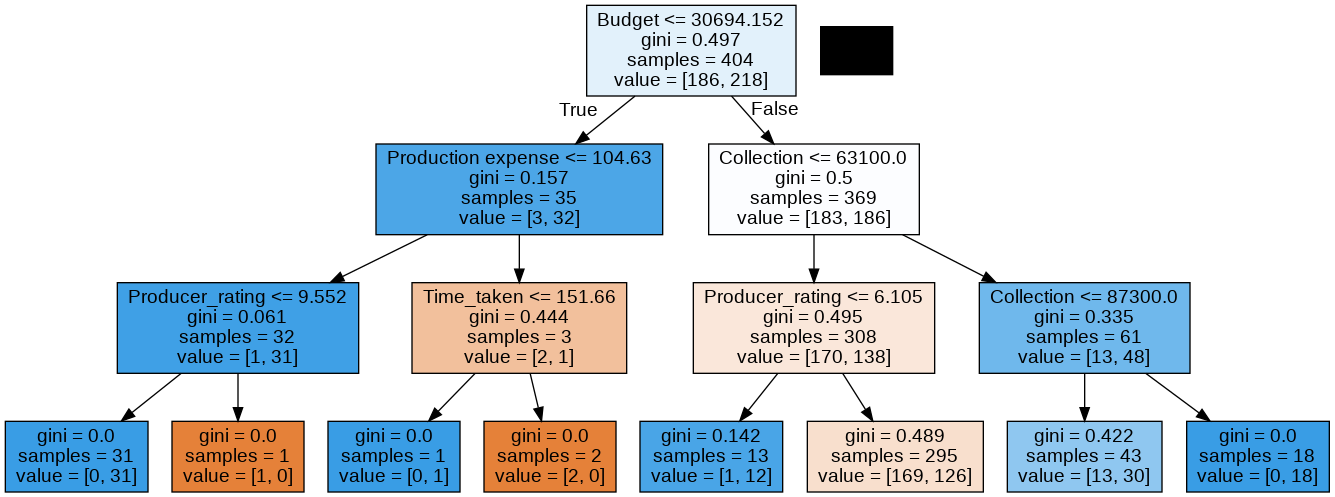

In [ ]:
# to plot the graph
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# CONTROLLING TREE GROWTH

In [ ]:
# This is done to avoid over fitting the model

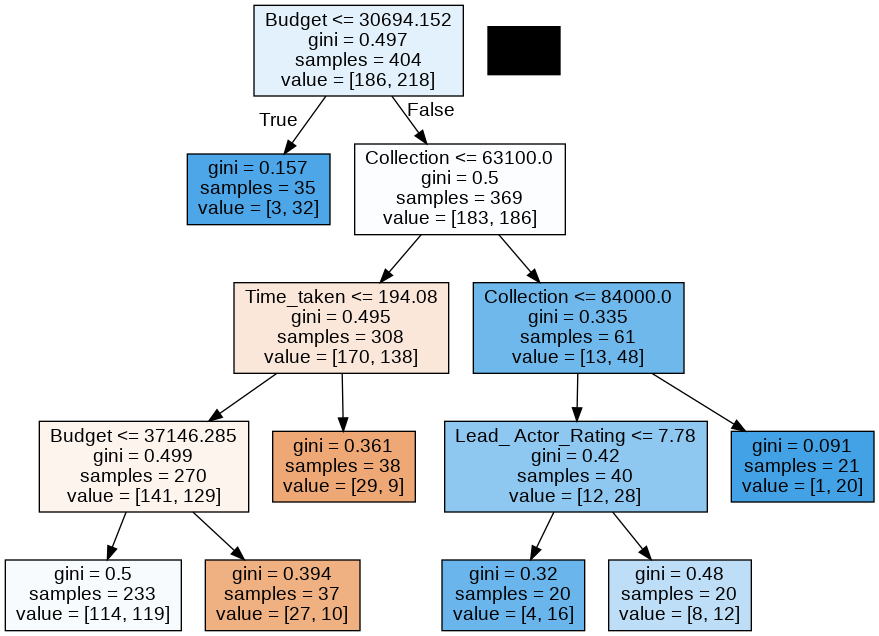

In [ ]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth =4)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file = None, feature_names = X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [ ]:
accuracy_score(y_test, clftree2.predict(X_test))

0.5588235294117647

# ENSEMBLE METHODS

# 1.  BAGGING

In [ ]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000, bootstrap = True, n_jobs = -1, random_state = 42)
# n_jobs to ask if we are to use the computing power of our pc
# for more information search bagging sklearn

In [ ]:
# to fit the model
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [ ]:
# to get the confusion matrix of the prediction
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[27, 17],
       [22, 36]])

In [ ]:
# to get the accuracy score of the model
accuracy_score(y_test, bag_clf.predict(X_test))

0.6176470588235294

# 2. RANDOM FOREST

In [ ]:
# to import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 1000, n_jobs = -1, random_state = 42)

In [ ]:
# to fit the model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
# to get the confusion matrix of the model
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[25, 19],
       [18, 40]])

In [ ]:
# to get the accuracy score of the model
accuracy_score(y_test, rf_clf.predict(X_test))

0.6372549019607843

# Grid Search

In [ ]:
# GridSearch allows us to find the best model given a data set very easily
# to import grid search cv
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {"max_features" : [4, 5, 6, 7, 8, 9, 10],
              "min_samples_split" : [2, 3, 10]}

In [ ]:
# storing in an object
grid_search = GridSearchCV(rf_clf, param_grid, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [ ]:
# fitting the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [ ]:
# to get the best model
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 2}

In [ ]:
# to get the best estimator
cvrf_clf = grid_search.best_estimator_


In [ ]:
# to get the accuracy score
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.6470588235294118

In [ ]:
# to get the confusion matrix
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[27, 17],
       [19, 39]])

# GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# creating the classifier object
gbc_clf = GradientBoostingClassifier()


In [ ]:
# to fit the model
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# to get the accuracy score
accuracy_score(y_test, gbc_clf.predict(X_test))

0.5882352941176471

In [ ]:
gbc_clf2 = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 1000, max_depth=1 )
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=1000)

In [ ]:
# to get the accuracy score
accuracy_score(y_train, gbc_clf2.predict(X_train))

0.9331683168316832

In [ ]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.6176470588235294

# Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# creating the model object
ada_clf = AdaBoostClassifier(learning_rate= 0.02, n_estimators = 5000)

In [ ]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [ ]:
# to get the accuracy score
accuracy_score(y_train, ada_clf.predict(X_train))

0.8886138613861386

In [ ]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.6274509803921569

In [ ]:
ada_clf2 = AdaBoostClassifier(rf_clf, learning_rate = 0.002, n_estimators = 500)

In [ ]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                         n_jobs=-1,
                                                         random_state=42),
                   learning_rate=0.002, n_estimators=500)

In [ ]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.6274509803921569

# XG_BOOST

In [ ]:
# to install xg boost
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Turning parameter

1. General Parameters: Guides all the overall functions
2. Booster Parameter: Guides all the individual booster(tree/regression) at each storing
3. Learning task Parameter: Guides the optimization performed

In [ ]:
import xgboost as xgb

In [ ]:
# creating the classifier object
xgb_clf = xgb.XGBClassifier(max_depth = 5, n_estimators = 5000, learning_rate = 0.3, n_jobs = -1)

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=5000, n_jobs=-1)

In [ ]:
# accuracy_score
accuracy_score(y_test, xgb_clf.predict(X_test))

0.6568627450980392

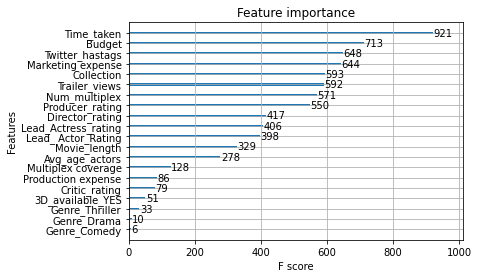

In [ ]:
# to get the plot importance
xgb.plot_importance(xgb_clf)

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators=500, learning_rate = 0.1, random_state = 42)

In [ ]:
# XG Boost gives the best result out of the boosting techniques

In [ ]:
# Using grid search to optimize XG Boost Classifier
param_test1 = {
    'max_depth': range(3, 10, 2),
    'gamma': [0.1,0.2, 0.3],
    'subsample': [0.8,0.9],
    'colsample_bytree': [0.8,0.9],
    'reg_alpha': [1e-2, 0.1, 1]
}

In [ ]:
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs = 1, cv = 5, scoring = 'accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(n_estimators=500, random_state=42),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [ ]:
cvxg_clf =  grid_search.best_estimator_

In [ ]:
# tp get the accuracy score
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.6372549019607843

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.1,
 'max_depth': 9,
 'reg_alpha': 1,
 'subsample': 0.8}